[<<<< Връщане към Подготовка 1](prep1.ipynb) $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ [Начална страница](./../welcome.ipynb) $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ [Продължи към Бонус 1 >>>>](bonus1.ipynb)
# Полезна математика
---

## Задача 1: Първи стъпки в математиката на компютърното зрение
С тази задача ти имаш възможността да направиш своите първи стъпки в света на [компютърното зрение](https://bg.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8E%D1%82%D1%8A%D1%80%D0%BD%D0%BE_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5) (от англ. Computer Vision). Ще използваме правилата за подобни триъгълници и питагоровата теорема от математиката в училище за нещо практично и полезно. С тяхна помощ ще измислим прост метод за приблизително измерване на разстоянието до познати обекти чрез снимка. Така ще можем просто да снимаме обект, чиито размери са ни известни, и да пресметнем колко далече се намира от камерата. Това е често използван метод в роботиката, когато един робот трябва да се направи да може да се ориентира в пространството и когато не е нужна особено голяма прецизност. Така се избягва нуждата от скъпи сензори като [лидар](https://bg.wikipedia.org/wiki/%D0%9B%D0%B8%D0%B4%D0%B0%D1%80).

За целта ще преминем през следните точки:
1. [Как се образуват снимките в стенопеични фотоапарати](#1-Как-се-образуват-снимките-в-стенопеични-фотоапарати)
2. [Как да пресметнем разстоянието до обект чрез големината му](#2-Как-да-пресметнем-разстоянието-до-обект-чрез-големината-му)
3. [Как приблизително да пресметнем фокусното разстояние на камерата](#3-Как-приблизително-да-пресметнем-фокусното-разстояние-на-камерата)
4. [Ще си нарисуваме окръжност и ще калибрираме камерата](#4-Калибриране-на-камерата-чрез-рисунка-на-окръжност)  
    4.1 [Рисуване и снимане на окръжността](#4.1-Рисуване-и-снимане-на-окръжността)  
    4.2 [Зареждане на нужните Python библиотеки](#4.2-Зареждане-на-нужните-Python-библиотеки)  
    4.3 [Зареждане на снимката](#4.3-Зареждане-на-снимката)  
    4.4 [Измерване на диаметъра на окръжността от снимката](#4.4-Измерване-на-диаметъра-на-окръжността-от-снимката)  
        4.4.1 [Начертаване на измервателна линия](#4.4.1-Начертаване-на-измервателна-линия)  
        4.4.2 [Пресмятане на дължината на линията](#4.4.2-Пресмятане-на-дължината-на-линията)  
    4.5 [Пресмятане на фокусното разстояние f](#4.5-Пресмятане-на-фокусното-разстояние-$f$)  
5. [Ще изпробваме метода за измерване на разстоянието върху други снимки](#5-Измерване-на-разстоянието-върху-други-снимки)  
    5.1 [Зареждане на снимка](#5.1-Зареждане-на-снимка)  
    5.2 [Измерване на диаметъра на окръжността от снимката](#5.2-Измерване-на-диаметъра-на-окръжността-от-снимката)  
        5.2.1 [Начертаване на измервателна линия](#5.2.1-Начертаване-на-измервателна-линия)  
        5.2.2 [Пресмятане на дължината на линията](#5.2.2-Пресмятане-на-дължината-на-линията)  
    5.3 [Пресмятане на разстоянието Z до окръжността](#5.3-Пресмятане-на-разстоянието-Z-до-окръжността)  

Ако много ти хареса задачата, със сигурност ще ти харесат и двете допълнителни бонус задачи на следващата страница!

Това съдържание е достъпно по всяко време и от бутона  от лентата в ляво.


### 1 Как се образуват снимките в стенопеични фотоапарати
В областта на компютърното зрение камерите се разглеждат опростено като [стенопеични фотоапарати](https://bg.wikipedia.org/wiki/%D0%A1%D1%82%D0%B5%D0%BD%D0%BE%D0%BF%D0%B5%D0%B8%D1%87%D0%B5%D0%BD_%D1%84%D0%BE%D1%82%D0%BE%D0%B0%D0%BF%D0%B0%D1%80%D0%B0%D1%82). На кратко, стенопеичните фотоапарати представляват затворена камера с малък отвор в средата в една от страните. Светлината преминава през отвора и образува обърното изображение върху отсрещната страна. Тъй като в компютърното зрение се ползват дигитални камери, изображението се формира върху фото сензор (най-често [CMOS сензор](https://bg.wikipedia.org/wiki/CMOS_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0)). Фото сензора представлява матрица от светочуствителни фотодиоди, които образуват пикселите на дигиталното изображение. Обектива на дигиталната камера, който обикновенно се състои от поне една оптична леща, се разглежда като миниатюрен отвор, където в точка се пресичат всички светлинни лъчи, попадащи върху фото сензора. Тази пресечна точка ще отбележим като $C$. Този опростен модел ни позволява сравнително лесно да опишем математически как една точка от триизмерното (3D) пространство се проецира върху фото сензора, тоест върху двуизмерното (2D) изображение. Модела е представен долу като *Фигура 1*. Модела разбира се има своите недостатъци и не взема предвид [дисторсията на лещите](https://bg.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D1%82%D0%BE%D1%80%D1%81%D0%B8%D1%8F), размиването на обекти извън фокус, евентуалното разминаване на центъра на фото сензора от оптичната ос на обектива и др. Модерните камери обаче са достатъчно качествено направени за да се постигне прецизност, достатъчна за демонстрацията в тази задача.

<img src="lession1/fig1.png" alt="Фигура 1" width="750"/><br>
*Фигура 1. Модел на стенопеичен фотоапарат.*

### 2 Как да пресметнем разстоянието до обект чрез големината му
Благодарение на опростения модел на стенопеична камера по-горе можем да пресметнем приблизителното разстояние до заснет обект от центъра на обектива $C$, стига да знаем фокусното разстояние на камерата. За целта нека разгледаме по-долу *Фигура 2*, където за улеснение е представен идеалният случай, при който обекта (стрелка) е паралелен и точно по средата на фото сензора. Отсечката $BB`$ показва пътя на единият краен светлинен лъч от върха на стрелката до пиксела на фото сензора, където върхът се отбелязва. Отсечката $AA'$ показва пътя на другия краен светлинен лъч от опашката на стрелката до пиксела на фото сензора, където опашката се отбелязва. Тези два лъча образуват заедно със стрелката $AB$ и нейната проекция $A'B'$ два подобни равнобедрени триъгълника $ABC$ и $A'B'C$ с еднакви ъгли. Според [правилото за подобни триъгълници](https://www.matematika.bg/geometry/similar-triangles.html), съответните страни и височините на два подобни триъгълника са пропорционални и имат едно и също съотношение. Височината на триъгълника $ABC$ е разстоянието $Z$ от обектива на камерата до стрелката, а височината на триъгълника $A'B'C$ е фокусното разстояние $f$ от обектива до фото сензора. За това $Z$ се отанся към $f$ така както $L$ се отнася към $L'$:

\begin{align}
    \frac{Z}{f} = \frac{L}{L'} \tag{1}
\end{align}

Като прехвърлим $f$ от другата страна на равенството, получаваме формулата за приблизителното изчисление на $Z$:

\begin{align}
    Z = f\cdot\frac{L}{L'}. \tag{2}
\end{align}

<details>
    <summary><font color="gray">Само за любопитни! Натисни тук за да научиш още нещо!</font></summary>
<br>
    
> Тук може би ще се запитате, как бихме могли да измерим дължината на проекцията на стрелката $L'$ върху фото сензора. Все пак с формулата по-горе искаме да измерим физическото разстояние $Z$ на стрелката в метри, а от заснетата снимка на стрелката можем да измерим нейната дължина $L'$ само в пиксели, в случая 10 px. Също така трябва да знаем и фокусното разстояние $f$ на използваната камера. По този въпрос ще помислим в следващата точка 3.
</details>
<br>

<img src="lession1/fig2.png" alt="Фигура 2" width="750"/><br>
*Фигура 2. Взаимовръзка между големината на обекта и разстоянието от обектива.*

### 3 Как приблизително да пресметнем фокусното разстояние на камерата
За да използваме изведеното уравнение $(2)$ за $Z$ по-горе, трябва първо да намерим фокусното разстояние $f$ на използваната камера. Тук може да ти хрумне да разглобиш камерата и да измериш собственоръчно разстоянието от обектива до фото сензора, но има и по-лесен начин. Ако преместим стрелката на определено разстояние от обектива на камерата, примерно $1,5 \, m$, и й направим снимка, в този момент $Z$ също е приблизително $1,5 \, m$ и в уравнение $(2)$ има само една единствена неизвестна - $f$. По този начин можем доста лесно да извършим грубо калибриране на камерата. Сега трябва само да разместим уравнение $(2)$, така че да получим $f$:

\begin{align}
    f = Z\cdot\frac{L'}{L} \tag{3}
\end{align}

и да заместим останалите променливи с техните актуални стойности.

<details>
    <summary><font color="gray">Само за любопитни! Натисни тук за да научиш още нещо!</font></summary>
<br>

> Ако все още те измъчва проблема от миналата точка, а именно, че няма как директно да измерим дължината на проекцията на стрелката $L'$ в метри, може сега да поразсъждаваме върху него. Ако заместим променливите в горното уравнение $(3)$ със съответните им мерни единици:
\begin{align}
    f = Z\cdot\frac{L'}{L} = m\cdot\frac{px}{m} = px \tag{4}
\end{align}
ще открием, че при калибрирането ще получим фокусното разстояние $f$ в пиксели ($px$). Това е страхотна новина, тъй като когато се върнем на уравнение $(2)$ за пресмятане на $Z$ и въведем актуалните стойности, или по-точно в случая съответните мерни единици, ще видим, че $px$ от $f$ и $L'$ ще се съкратят и като мерна единица ще останат само метри:
\begin{align}
    Z = f\cdot\frac{L}{L'} = px\cdot\frac{m}{px} = m \tag{5}
\end{align}
Всъщност мерната единица $px$ в нашия случай има своята физическа величина - пискелите на фото сензора имат реална дължина. Точната дължина не ни е известна, тя вариира между $0,001$ и $0,009 \, mm$ при различните камери. Но за нашата камера тя е константна (почти*) и можем да използваме съкращението "$px$" все едно че е неизвестна променлива, която за късмет във финалното уравнение се съкращава и не се налага да знаем точната й стойност.
<br></br>
\* Всъщност пикселите на фото сензора не са идеални квадрати, ами често имат височина и широчина, които не са равни. Стриктно погледнато, би трябвало да калибрираме хоризонталното фокусно разстояние $f_x$ и вертикалното $f_y$ използвайки хоризонтално разположена стрелка и след това вертикално. Но разминаването е сравнително малко и за нашата задача можем да си спестим допълнителните усилия.
</details>

### 4 Калибриране на камерата чрез рисунка на окръжност
По-горе използвахме стрелка за да обясним модела на стенопеичната камера, но тя не е особено подходящ обект за измерване на разстояние, тъй като стрелката трябва винаги да се снима насочена с лицевата част към камерата. Ако стрелката се вижда под ъгъл на снимката, то проицираната й дължина върху снимката ще изглежда по-малка в зависимост от ъгъла. За тази задача по-подходящо е да използваме нарисувана окръжност, която се проицира на снимката като елипса с константна дължина независимо от ъгъла на снимане. <!--Стига разбира се да пренебрегнем деформацията заради [перспективата](https://bg.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%B0), при която окръжността допълнително. -->
Това е представено нагледно във *Фигура 3*.

<img src="lession1/fig3.png" alt="Фигура 3" width="750"/><br>
*Фигура 3. Промяна на формата в зависимост от ъгъла на снимане на нарисувана стрелка (ляво) и на нарисувана окръжност (дясно).*
<br></br>

Стига толкова теория за сега, нека почнем с **практическата** част! Тази точка е разделена на следните подточки:

4.1 [Рисуване и снимане на окръжността](#4.1-Рисуване-и-снимане-на-окръжността)  
4.2 [Зареждане на нужните Python библиотеки](#4.2-Зареждане-на-нужните-Python-библиотеки)  
4.3 [Зареждане на снимката](#4.3-Зареждане-на-снимката)  
4.4 [Измерване на диаметъра на окръжността от снимката](#4.4-Измерване-на-диаметъра-на-окръжността-от-снимката)  
4.5 [Пресмятане на фокусното разстояние f](#4.5-Пресмятане-на-фокусното-разстояние-$f$)  

#### 4.1 Рисуване и снимане на окръжността
Първо, взимаме бял лист хартия, начертаваме на него окръжност с диаметър примерно $6 \, cm$, оцветяваме я в черно за контраст и залепваме листа примерно на парче картон за да не се гъне. Ако нямаш пергел за да начертаеш окръжността, може да вземеш кръгла чаша и да очертаеш по нея. Тогава разбира се ще трябва да измериш диаметъра на окръжността за да са ти верни изчисленията. Вече имаме визуален маркер, който лесно се разпознава от разстояние.

Следващата съпка е да сложим начертаната окръжност облегната на някоя стена на земята, да вземем камера (смартфон, лаптоп или каквато камера имаш) и да я поставим на точно определено разстояние от окръжността, примерно на $1,5$ метъра. Ако нямаш нищо подходящо да измериш толкова дълго разстояние (ролетка или метър), тогава измери с линийка поне $50 \, cm$. Това разстояние при калибрирането определя разстоянието, при което после измерванията ще са най-точни. Това е така, защото при по-голямо или по-малко разстояние, камерата евентуално ще префокусира автоматично, при което фокусното разстояние $f$ ще се промени и вече изчесленията няма да са ни точни. Ако знаеш как, то тогава може да изключиш автоматичния фокус (ако камерата въобще има такъв) и да настроиш сам подходяща стойност. Тогава точността ще спада само ако се измерват разстояния, на които обектите се виждат размазано. 

<details>
    <summary><font color="gray">Само за любопитни! Натисни тук за да научиш още нещо!</font></summary>
<br>

> Дали сниманите обекти ще се виждат размазано или на фокус, зависи от [дълбочината на рязкост](https://bg.wikipedia.org/wiki/%D0%94%D1%8A%D0%BB%D0%B1%D0%BE%D1%87%D0%B8%D0%BD%D0%B0_%D0%BD%D0%B0_%D1%80%D1%8F%D0%B7%D0%BA%D0%BE%D1%81%D1%82), като на колкото по-далечни обекти се фокусира камерата, толкова по-голяма е дълбочината на рязкост. Най-голяма дълбочина на рязкост се постига когато обективът се фокусира на безкрайност (на повечето камери обазначено с иконка на планина ) и [блендата](https://bg.wikipedia.org/wiki/%D0%91%D0%BB%D0%B5%D0%BD%D0%B4%D0%B0) се настрои на възможно най-малък отвор. Тогава всичко над определено разстояние от обектива на камерата, така нареченото [хиперфокалното разстояние](https://bg.wikipedia.org/wiki/%D0%A5%D0%B8%D0%BF%D0%B5%D1%80%D1%84%D0%BE%D0%BA%D0%B0%D0%BB%D0%BD%D0%BE_%D1%80%D0%B0%D0%B7%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5), излиза ясно "на фокус". Тогава обаче задължително ще ти трябва метър за да измериш точно по-голямато разстояние до начертаната окръжност.

</details><br>

Сега направи една, две снимки при избраната конфигурация и си запиши разстоянието $Z$ от обектива до начертаната окръжност. Важното е така да снимаш окръжността, че да се вижда по средата на снимката, защото в крайщата на снимката може да има силно перспективно изкривяване или евентуално дисторсия. 

<details>
    <summary><font color="gray">Само за любопитни! Натисни тук за да научиш още нещо!</font></summary>
<br>

> Особено при [широкоъгълните обективи](https://digital.bg/%D0%BA%D0%B0%D0%BA%D0%B2%D0%BE-%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D1%8F%D0%B2%D0%B0-%D1%88%D0%B8%D1%80%D0%BE%D0%BA%D0%BE%D1%8A%D0%B3%D1%8A%D0%BB%D0%BD%D0%B8%D1%8F-%D0%BE%D0%B1/), каквито имат повечето модерни смартфони, дисторсията може да е значителна в крайщата на снимката. Дори тази дисторсия да се коригира, както е при повечето смартфони със широкоъгълни обективи, остава перспективното изкривяване, което ще доведе до значителни грешки в нашето измерване. Перспективното изкривяване не може да бъде коригирано и е подобно на [деформацията при картографията](https://en.wikipedia.org/wiki/Gnomonic_projection#/media/File:Gnomonic_with_Tissot's_Indicatrices_of_Distortion.svg), която е неизбежна когато се опитате да проицирате земното полукълбо на лист хартия.

</details><br>

Ако не можеш да направиш собствени снимки, по-долу ще можеш да използваш моите снимки.

#### 4.2 Зареждане на нужните Python библиотеки
За нашата задача ни трябват библиотеки за обработка и показване на изображения, за интерактивно взаимодействие със скриптовете, за математически операции и няколко специално за задачата направени модула. За да ги заредиш, кликни върху блока с код по-долу за да се маркира и натисни клавишната комбинация Shift+Enter или бутона Run ![run.png](run.png) от лентата с бутони горе.

In [ ]:
# активиране на интерактивния графичен плот
%matplotlib widget
# зареждане на библиотеката за графичен плот
import matplotlib.pyplot as plt
# зареждане на библиотеката за интерактивни контроли
import ipywidgets as widgets
# зареждане на библиотеката OpenCV за компютърно зрение за обработка на изображение
import cv2
# зареждане на библиотеката за математически изчисления
import math
# зареждане функцията ruler_plt() от модула за измерване на дължини върху плот
from custom_scripts.measure_plt import ruler_plt
# зареждане на функцията read_img() от модула за прочитане на качени снимки
from custom_scripts.read_uploaded_img import read_img
# изкарване на съобщение като се извършат всички команди
print('>>>Готово!<<<')

#### 4.3 Зареждане на снимката
Сега трябва да качиш снимката, която направи по-рано. Затова активирай следващия блок. Под него ще се появи бутон "Upload", от който можеш да избереш желаната снимка.

In [ ]:
uploader = widgets.FileUpload(accept='', multiple=False)
display(uploader)

Не се плаши ако не разбираш кода. Важният за задачата код ще бъде ясно обяснен.

След като качиш снимката, тя трябва да се преобразува в подходящ формат за работа. Затова активирай следващия блок.

In [ ]:
# прочитане на качената снимка
image = read_img(uploader)

В случай, че не си направил твой си снимки, можеш да използваш моята снимка като активираш следния блок:

In [ ]:
image = cv2.imread('lession1/calibration.jpg')
# преобразуване в стандартната за matplotlib цветова схема червено/зелено/синьо (RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# изкарване на съобщение като се извършат всички команди
print('>>>Готово!<<<')

#### 4.4 Измерване на диаметъра на окръжността от снимката
Тъй като не можем да измерим директно диаметъра на окръжността от снимката, защото може да сме я снимали под ъгъл, вместо това трябва да се опитаме да измерим дължината $L'$ на проицираната като елипса окръжност върху снимката (припомни си [*Фигура 3*](#4-Калибриране-на-камерата-чрез-рисунка-на-окръжност)). За целта ще използваме скрипт, който показва снимката и ни позволява чрез кликване с десния бутон на мишката (съкратено като "RMB", от английски "right mouse button") да начертаем линия върху снимката, на която в последствие можем да пресметнем дължината. Затова тази подточка е разделена на следните две подточки:

4.4.1 [Начертаване на измервателна линия](#4.4.1-Начертаване-на-измервателна-линия)  
4.4.2 [Пресмятане на дължината на линията](#4.4.2-Пресмятане-на-дължината-на-линията)  

##### 4.4.1 Начертаване на измервателна линия
За начертаването на измервателна линия ще използваме функцията `ruler_plt()`. Тя връща координатите на двете крайни точки на линията в пиксели като списък [($x_1$, $y_1$), ($x_2$, $y_2$)]. Всяко наше действие може да отнеме 1-2 секунди докато се отрази на снимката, за това трябва да работим бавно и търпеливо.

Стъпките за измерване на $L'$ са следните:
- стартираме скрипта от долния блок
- под него се показва снимката
- преместваме курсора с мишката върху снимката за да се покаже лента с бутони от лявата страна
- щракаме на бутона с квадрадче ![rect.png](rect.png) "Zoom to rectangle"
- чертаем квадрад около окръжността на снимката за да я увеличим (чрез натискане и задържане на левия бутон на мишката (LMB) и влачене на мишката за да разпънем квадрата)
- ако сме увеличили грешен регион, можем да върнем стъпка назад от бутона със стрелка сочеща на ляво ![back.png](back.png) "Back to previous view"
- поставяш началната и крайната точка на линията чрез натискане на RMB върху снимката на желаното място
- след като вече е начертана линията, при повторно натискане на RMB върху изображението, линията се изтрива и се създава нова начална точка за нова линия
- можеш да поставяш началната и крайната точка на линията на ново толкова пъти, колкото е нужно за да оцелиш точно дължината на елипсата и си доволен с резултата
- като си доволен с резултата, трябва да внимаваш да не кликнеш по невнимание някъде върху снимката с RMB и така да започнеш чертането на линия на ново
- в променливата "coords" се запазват координатите на началната и крайната точка на начертаната линия

In [ ]:
# създаване на нов плот
fig = plt.figure()
# създаване на подплот
ax = fig.add_subplot(111)
# показване на снимката върху плота
ax.imshow(image)
# активиране на функцията за чертане на линия при кликване върху плота
coords = ruler_plt(fig, ax)

##### 4.4.2 Пресмятане на дължината на линията
Сега трябва да изчислим дължината на начертаната линия. С помощта на [питагоровата теорема](https://bg.wikipedia.org/wiki/%D0%9F%D0%B8%D1%82%D0%B0%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0) можем да покажем, че дължината на произволна отсечка $c$ в 2D пространството е корен квадратен от сумата на квадратите на x и y компонентите й $a$ и $b$:

\begin{align}
    c = \sqrt{a^2 + b^2}, \tag{6}
\end{align}

тъй като винаги се образува правоъгален триъгълник с хипотенуза $c$ и катети $a$ и $b$, виж по-долу *Фигура 4*. За да пресметнем по тази формула диаметъра $L'$ на окръжността, трябва първо да пресметнем компонентите му $L'_x$ и $L'_y$ от известните ни координати:

\begin{align}
    L'_x &= x_2 - x_1, \tag{7}\\
    L'_y &= y_2 - y_1. \tag{8}
\end{align}

<img src="lession1/fig4.png" alt="Фигура 4" width="600"/><br>
*Фигура 4. Прилагане на питагоровата теорема за пресмятане на диаметъра на окръжността.*


Това пресмятане можем да го извършим с три реда код. Като жокер ще ти покажа в следващия блок как се смята дължината на примерна отсечка с координати $x_1 = 2, \, y_1 = 7, \, x_2 = 3, \, y_2 = 6$:

In [ ]:
# Да речем, че си измерил следните примерни координати на линията:
coordinates = [(2, 7), (3, 6)] # [(x1, y1), (x2, y2)]
print('coordinates: ', coordinates)
# x компонентата (катет а) се пресмята така:
a = coordinates[1][0] - coordinates[0][0]
# Тук от списъка с координати взимаме от крайната точка coordinates[1] първата компонента [0], тоест x2
# и от нея изваждаме от началната точка coordinates[0] първата компонента [0], тоест x1.
# Резултата го показваме с функцията print():
print('a = ', a)
# Аналогично пресмятаме и показваме y компонентата (катет b):
b = coordinates[1][1] - coordinates[0][1]
print('b = ', b)
# Сега остава само да пресметнем хипотенузата c помощта на питагоровата теорема:
c = math.sqrt(a**2 + b**2)
# Тук използваме математическата функция math.sqrt() за пресмятане на корен квадратен
# както и **2 за повдигането на катетите a и b на квадрат.
# И показваме резултата с функцията print():
print('c = ', c)

В примера по-горе на практика пресметнахме дължината на диагонала на квадрат със страни равни на едно и получихме $\sqrt{2}=1.4142$, което лесно можеш да провериш на ръка с лист хартия, прост чертеж и калкулатор, че е така и че метода за пресмятане е верен.  

Използвайки примера сега сам можеш да се сетиш как да пресметнеш проицирания диаметър на окръжността $L'$ в пиксели. Първо пресметни компонентите му $L'_x$ и $L'_y$ от известните ни координати $[(x_1, y_1), (x_2, y_2)]$ запаметени в променливата `coords`: <a name="lcalc"></a>

In [ ]:
Lx_proj =
Ly_proj =

<details>
    <summary>Ако не можеш да се сетиш как става, щракни тук за да видиш отговора</summary>
<br>

```python
Lx_proj = coords[1][0] - coords[0][0]
Ly_proj = coords[1][1] - coords[0][1]
```
</details><br>

Сега пресметни $L'$ с помощта на питагоровата теорема:

In [ ]:
L_proj =
# сега можеш да покажеш резултата чрез функцията print()
print("L' = ", L_proj)

<details>
    <summary>Ако не можеш да се сетиш как става, щракни тук за да видиш отговора</summary><br>

```python
L_proj = math.sqrt(Lx_proj**2 + Ly_proj**2)
```
</details><br>

#### 4.5 Пресмятане на фокусното разстояние $f$
Супер! Ако си стигнал до тук, значи си минал половината от задачата. Последната стъпка от тази точка е пресмятането на фокусното разстояние $f$ на камерата. За това ще си припомним уравнение $(3)$:

\begin{align}
    f = Z\cdot\frac{L'}{L}. \tag{3}
\end{align}

Тук ще ти трябват единствено операторите за умножение "*" и делене "/" и само един ред код. Използвай за това следващия блок.

In [ ]:
# Първо трябва да въведеш реалния диаметър на окръжността
# (ако си използвал моята снимка, то диаметъра е 0.06 метъра):
L =
# и нагласеното разстояние Z от камерата до окръжността
# (ако си използвал моята снимка, то разстоянието е 1.5 метъра):
Z =
# като всички физически дължини в цялата задача трябва да са в една и съща мерна единица, примерно в метри.
# Самата мерна единица обаче не се въвежда в променливите, тъй като променливите могат да запаметяват само един вид информация,
# примерно число или низ от символи. Обикновено в програмирането не се използват променливи за запаметяване на мерните единици. 

# Накрая трябва да извършиш пресмятането използвайки вече запаметената променлива L_proj от по-горе:
f =
# сега можеш да покажеш резултата чрез функцията print()


<details>
    <summary>Ако не можеш да се сетиш как да напишеш формулата за f, щракни тук за да видиш отговора.</summary>
<br>

```python
f = Z * L_proj / L
```

</details><br>

След като пресметнеш $f$ по-горе, калибрирането е завършено. Запиши си стойността на $f$ на лист хартия за да не се налага да го смяташ отново, в случай че не успееш да завършиш целият урок наведнъж. Сега можеш да преминеш към измерването!

### 5 Измерване на разстоянието върху други снимки
След като сме изчислили фокусното разстояние $f$ на камерата, можем да измерим разстоянието $Z$ до окръжността от всяка* снимка! За целта ще заредим отново снимка, ще премерим дължината $L'$ на проицираната като елипса окръжност върху фото сензора и ще пресметнем $Z$ по уравнение $(2)$.

\* Стига окръжността да е на фокус и да не променяме резолюцията на снимката и фокуса на обектива.

Тази точка е разделена на следните подточки:

5.1 [Зареждане на снимка](#5.1-Зареждане-на-снимка)  
5.2 [Измерване на диаметъра на окръжността от снимката](#5.2-Измерване-на-диаметъра-на-окръжността-от-снимката)  
5.3 [Пресмятане на разстоянието Z до окръжността](#5.3-Пресмятане-на-разстоянието-Z-до-окръжността)  

#### 5.1 Зареждане на снимка
Направи снимка на окръжността на избрано от теб разстояние, което искаш да измериш. Тук също е важно така да снимаш окръжността, че да се вижда по средата на снимката, за да избегнеш перспективното изкривяване в крайщата на снимката. Ако не можеш да направиш сам снимка, по-долу ще можеш да използваш някоя от моите.

За да качиш твоята снимка, активирай следващия блок. Под него ще се появи бутон "Upload", от който можеш да избереш желаната снимка.

In [ ]:
uploader = widgets.FileUpload(accept='', multiple=False)
display(uploader)

След като качиш снимката, тя трябва да се преобразува в подходящ формат за работа. Затова активирай следващия блок.

In [ ]:
# прочитане на качената снимка
image = read_img(uploader)

В случай, че не си направил твой си снимки, можеш да използваш една от моите снимки. Те са правени на четири различни разстояния 90, 120, 150 и 180 cm, като на всяко разстояние съм направил по 4-5 снимки, на които окръжността е завъртяна под различен ъгъл.

<details>
    <summary>Натисни тук за да видиш наличните снимки.</summary>
<br>

> 90cm1.jpg   
    ...  
90cm4.jpg  
<br>
120cm1.jpg  
    ...  
120cm5.jpg  
<br>
150cm1.jpg  
    ...  
150cm4.jpg  
<br>
180cm1.jpg  
    ...  
180cm4.jpg  
</details><br>

За целта трябва в блока по-долу между кавичките във функцията `cv2.imread('')` да въведеш пътят до снимките `lession1/` последван от името на желаната снимка и да го активираш. Там вече е въведен пътя до първата снимка като пример. Ако внимаваш да измериш точно диаметъра на окръжността от снимката, грешката в измерването на разстоянието $Z$ при повечето от тези снимки е в рамките на $±3 \, cm$.

In [ ]:
image = cv2.imread('lession1/90cm5.jpg')
# преобразуване в стандартната за matplotlib цветова схема червено/зелено/синьо (RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# изкарване на съобщение като се извършат всички команди
print('>>>Готово!<<<')

#### 5.2 Измерване на диаметъра на окръжността от снимката
Вместо диаметъра на окръжността отново ще трябва да измерим дължината $L'$ на проицираната като елипса окръжност върху снимката. За целта ще използваме пак скрипта, който показва снимката и ни позволява чрез кликване с RMB да начертаем линия върху снимката, на която в последствие можем да пресметнем дължината. Затова тази подточка е разделена на следните две подточки:

5.2.1 [Начертаване на измервателна линия](#5.2.1-Начертаване-на-измервателна-линия)  
5.2.2 [Пресмятане на дължината на линията](#5.2.2-Пресмятане-на-дължината-на-линията)  

##### 5.2.1 Начертаване на измервателна линия
Актвивирай блока по-долу с кода за показване на снимката и начертаване на измервателната линия. Както вече беше споменато, всяко наше действие може да отнеме 1-2 секунди докато се отрази на снимката, за това трябва да работим бавно и търпеливо.

<details>
    <summary>Натисни тук ако искаш да си припомниш стъпките за измерване на дължината L'</summary>
<br>

- стартираме скрипта от долния блок
- под него се показва снимката
- преместваме курсора с мишката върху снимката за да се покаже лента с бутони от лявата страна
- щракаме на бутона с квадрадче 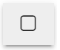 "Zoom to rectangle"
- чертаем квадрад около окръжността на снимката за да я увеличим (чрез натискане и задържане на левия бутон на мишката (LMB) и влачене на мишката за да разпънем квадрата)
- ако сме увеличили грешен регион, можем да върнем стъпка назад от бутона със стрелка сочеща на ляво 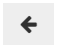 "Back to previous view"
- поставяш началната и крайната точка на линията чрез натискане на RMB върху снимката на желаното място
- след като вече е начертана линията, при повторно натискане на RMB върху изображението, линията се изтрива и се създава нова начална точка за нова линия
- можеш да поставяш началната и крайната точка на линията на ново толкова пъти, колкото е нужно за да оцелиш точно дължината на елипсата и си доволен с резултата
- като си доволен с резултата, трябва да внимаваш да не кликнеш по невнимание някъде върху снимката с RMB и така да започнеш чертането на линия на ново
- в променливата `coords` се запазват координатите на началната и крайната точка на начертаната линия
</details>

In [ ]:
# създаване на нов плот
fig = plt.figure()
# създаване на подплот
ax = fig.add_subplot(111)
# показване на снимката върху плота
ax.imshow(image)
# активиране на функцията за чертане на линия при кликване върху плота
coords = ruler_plt(fig, ax)

##### 5.2.2 Пресмятане на дължината на линията
Сега трябва пак да изчислим дължината на начертаната линия с помощта на [питагоровата теорема](https://bg.wikipedia.org/wiki/%D0%9F%D0%B8%D1%82%D0%B0%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0):

\begin{align}
    c = \sqrt{a^2 + b^2}. \tag{6}
\end{align}

За да пресметнем по тази формула дължината $L'$ на елипсата, трябва първо да пресметнем компонентите й $L'_x$ и $L'_y$ от известните ни координати:

\begin{align}
    L'_x &= x_2 - x_1, \tag{7}\\
    L'_y &= y_2 - y_1. \tag{8}
\end{align}

Тук ти трябва същите [три реда код](#lcalc) от подточка 4.4.2 за да пресметнеш дължината $L'$ в пиксели от вече известните координати запаметени в променливата `coords`. За това използвай следващия блок:

In [ ]:
Lx_proj =
Ly_proj =
L_proj =
# сега можеш да покажеш резултата чрез функцията print()


#### 5.3 Пресмятане на разстоянието Z до окръжността
За да пресметнем разстоянието $Z$ от камерата до окръжността ще си припомним уравнение $(2)$:

\begin{align}
    Z = f\cdot\frac{L}{L'}. \tag{2}
\end{align}

За това уравнение ти трябва да напишеш код в следващия блок и да покажеш резултата чрез функцията print(). Резултата ще е в същата мерната единица, която си използвал за въвеждането на $L$ и $Z$ при калибрирането на камерата.

In [ ]:
Z =
# сега можеш да покажеш резултата чрез функцията print()


<details>
    <summary>Ако не можеш да се сетиш как да напишеш формулата за Z, щракни тук за да видиш отговора.</summary>
<br>

```python
Z = f * L / L_proj
```

</details>
<br>

Поздравления! Ти реши успешно тази задача! Тази точка 5 можеш да я повториш за всяка снимка, на която искаш да измериш разстоянието до окръжността. Ако много ти хареса задачата, със сигурност ще ти харесат и двете допълнителни бонус задачи на следващата страница.

---
[<<<< Връщане към Подготовка 1](prep1.ipynb) $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ [Начална страница](./../welcome.ipynb) $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ [Продължи към Бонус 1 >>>>](bonus1.ipynb)